In [1]:
import pandas as pd
df = pd.read_csv('data/raw/scores_df_original.csv')
df

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

In [3]:
import pandas as pd

# Assuming your DataFrame is named `df`
columns_to_keep = [
    'studentId',
    'studentLevel',
    'year',
    'measurementTypeId',
    'subgroup_specialEd',
    'subgroup_lunchStatus',
    'subgroup_gender',
    'subgroup_ethnicity',
    'subgroup_ell',
    'subgroup_bottom25',
    'value_actMathScore',
    'value_actEnglishScore',
    'value_actReadingScore',
    'value_actScienceScore',
    'value_actCompositeScore',
    'value_scantronMath',
    'value_scantronReading'
]

# Filter the DataFrame to keep only the specified columns
df2 = df[columns_to_keep]

# Display the first few rows of the filtered DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   studentId                303750 non-null  int64  
 1   studentLevel             303750 non-null  int64  
 2   year                     303750 non-null  int64  
 3   measurementTypeId        303750 non-null  int64  
 4   subgroup_specialEd       303750 non-null  int64  
 5   subgroup_lunchStatus     303750 non-null  int64  
 6   subgroup_gender          303750 non-null  int64  
 7   subgroup_ethnicity       303750 non-null  int64  
 8   subgroup_ell             303750 non-null  int64  
 9   subgroup_bottom25        303750 non-null  int64  
 10  value_actMathScore       303750 non-null  float64
 11  value_actEnglishScore    303750 non-null  float64
 12  value_actReadingScore    303750 non-null  float64
 13  value_actScienceScore    303750 non-null  float64
 14  valu

In [5]:
df2 = df2.dropna()

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming your DataFrame is named `df`


# List of test score columns to cluster on
test_score_columns = [
    'value_actMathScore']
'''
test_score_columns = [
    'value_actMathScore',
    'value_actEnglishScore',
    'value_actReadingScore',
    'value_actScienceScore',
    'value_actCompositeScore',
    'value_scantronMath',
    'value_scantronReading'
]
'''

# Feature columns for clustering
feature_columns = [
    'studentId',
    'studentLevel',
    'year',
    'measurementTypeId',
    'subgroup_specialEd',
    'subgroup_lunchStatus',
    'subgroup_gender',
    'subgroup_ethnicity',
    'subgroup_ell',
    'subgroup_bottom25'
]

# Dictionary to store clustering results
clustering_results = {}

for test_score in test_score_columns:
    print(f"Clustering for {test_score}")

    # Drop rows with missing values for the current test score
    df_current = df2.dropna(subset=[test_score])

    # Features for clustering
    X = df_current[feature_columns]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust n_clusters
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust hyperparameters as needed
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Store results in dictionary
    clustering_results[test_score] = {
        'kmeans_labels': kmeans_labels,
        'dbscan_labels': dbscan_labels
    }

    # Add cluster labels to the DataFrame for analysis (optional)
    df_current[f"{test_score}_kmeans_cluster"] = kmeans_labels
    df_current[f"{test_score}_dbscan_cluster"] = dbscan_labels

    # Display cluster counts
    print(f"KMeans cluster counts for {test_score}:\n{np.unique(kmeans_labels, return_counts=True)}")
    print(f"DBSCAN cluster counts for {test_score}:\n{np.unique(dbscan_labels, return_counts=True)}")

# The `clustering_results` dictionary now contains clustering labels for each test score.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming your DataFrame is named `df`


# List of test score columns to cluster on
test_score_columns = [
    'value_actMathScore']
'''
test_score_columns = [
    'value_actMathScore',
    'value_actEnglishScore',
    'value_actReadingScore',
    'value_actScienceScore',
    'value_actCompositeScore',
    'value_scantronMath',
    'value_scantronReading'
]
'''

# Feature columns for clustering
feature_columns = [
    'studentId',
    'studentLevel',
    'year',
    'measurementTypeId',
    'subgroup_specialEd',
    'subgroup_lunchStatus',
    'subgroup_gender',
    'subgroup_ethnicity',
    'subgroup_ell',
    'subgroup_bottom25'
]

# Dictionary to store clustering results
clustering_results = {}

for test_score in test_score_columns:
    print(f"Clustering for {test_score}")

    # Drop rows with missing values for the current test score
    df_current = df2

    # Features for clustering
    X = df_current[feature_columns]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust n_clusters
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust hyperparameters as needed
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Store results in dictionary
    clustering_results[test_score] = {
        'kmeans_labels': kmeans_labels,
        'dbscan_labels': dbscan_labels
    }

    # Add cluster labels to the DataFrame for analysis (optional)
    df_current[f"{test_score}_kmeans_cluster"] = kmeans_labels
    df_current[f"{test_score}_dbscan_cluster"] = dbscan_labels

    # Display cluster counts
    print(f"KMeans cluster counts for {test_score}:\n{np.unique(kmeans_labels, return_counts=True)}")
    print(f"DBSCAN cluster counts for {test_score}:\n{np.unique(dbscan_labels, return_counts=True)}")

# The `clustering_results` dictionary now contains clustering labels for each test score.

In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming your DataFrame is named `df2`

# Use only value_actMathScore for clustering
test_score_column = 'value_scantronMath'

# Drop rows with missing values for the selected test score
df_current = df2.dropna(subset=[test_score_column])

# Select only the column to cluster
X = df_current[[test_score_column]]

# Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

'''
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5, metric = 'euclidean')  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)
'''
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(X_scaled)


# Add cluster labels back to the DataFrame
df_current[f"{test_score_column}_dbscan_cluster"] = kmeans_labels

# Display cluster counts
print(f"DBSCAN cluster counts:\n{np.unique(kmeans_labels, return_counts=True)}")

# Optional: View the updated DataFrame
print(df_current.head())


DBSCAN cluster counts:
(array([0, 1, 2, 3, 4]), array([ 20030, 114351,  17323,  49078,  52478], dtype=int64))
   studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0      44774             9  2018                  6                   0   
1      44774             8  2017                  6                   0   
2      44774             8  2017                  4                   0   
3      44775             8  2017                  4                   0   
4      44775             8  2017                  6                   0   

   subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  subgroup_ell  \
0                     0                0                   0             0   
1                     0                0                   0             0   
2                     0                0                   0             0   
3                     0                0                   0             0   
4                     0                0         

In [13]:
# Group by clusters and compute summary statistics
cluster_summary = df_current.groupby(f"{test_score_column}_dbscan_cluster").mean()
print(cluster_summary)


                                       studentId  studentLevel         year  \
value_scantronMath_dbscan_cluster                                             
0                                   95713.783475      7.454019  2017.463854   
1                                  129581.409948      6.559698  2016.869009   
2                                  108747.851411      5.767534  2017.491658   
3                                   97771.367171      4.398468  2017.381515   
4                                   95318.744007      6.052975  2017.460326   

                                   measurementTypeId  subgroup_specialEd  \
value_scantronMath_dbscan_cluster                                          
0                                           2.824613            0.005492   
1                                           2.922825            0.729806   
2                                           1.936847            0.001847   
3                                           2.427035            0.

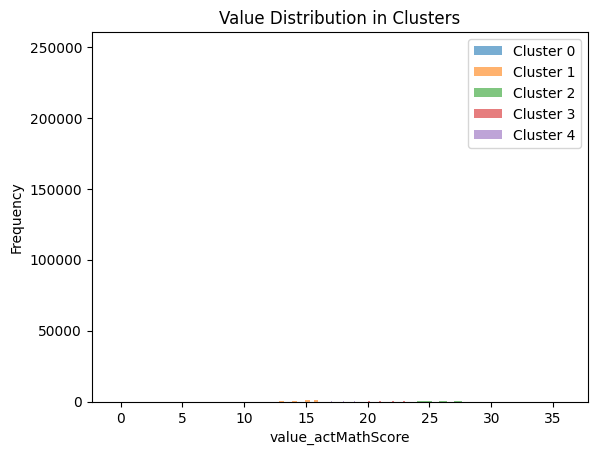

In [8]:
import matplotlib.pyplot as plt

# Plot histogram for each cluster
for cluster in np.unique(kmeans_labels):
    plt.hist(
        df_current[df_current[f"{test_score_column}_dbscan_cluster"] == cluster][test_score_column],
        bins=20, alpha=0.6, label=f"Cluster {cluster}"
    )

plt.title("Value Distribution in Clusters")
plt.xlabel(test_score_column)
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [9]:
# Select two features for visualization
X_visual = df_current[['value_actMathScore', 'subgroup_lunchStatus']].dropna()

# Add clusters back for visualization
X_visual['cluster'] = kmeans.predict(scaler.transform(X_visual))

# Scatter plot
plt.figure(figsize=(8, 6))
for cluster in np.unique(X_visual['cluster']):
    cluster_data = X_visual[X_visual['cluster'] == cluster]
    plt.scatter(cluster_data['value_actMathScore'], cluster_data['subgroup_lunchStatus'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Clusters of Math vs subgroup_lunchStatus")
plt.xlabel('ACT Math Score')
plt.ylabel('subgroup_lunchStatus')
plt.legend()
plt.show()

'''
e_columns = [
    'studentId',
    'studentLevel',
    'year',
    'measurementTypeId',
    'subgroup_specialEd',
    'subgroup_lunchStatus',
    'subgroup_gender',
    'subgroup_ethnicity',
    'subgroup_ell',
    'subgroup_bottom25'
    '''


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- subgroup_lunchStatus


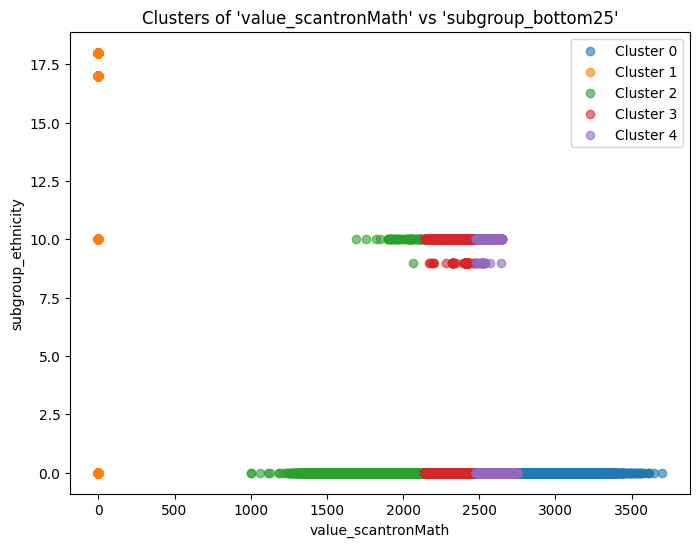

"\n   'measurementTypeId',\n    'subgroup_specialEd',\n    'subgroup_lunchStatus',\n    'subgroup_gender',\n    'subgroup_ethnicity',\n    "

In [18]:
# Select the feature used for clustering
X_visual = df_current[['value_scantronMath', 'subgroup_ethnicity']].dropna()

# Standardize only the feature used in clustering
X_visual_scaled = scaler.transform(X_visual[['value_scantronMath']])

# Predict clusters based on the scaled feature
X_visual['cluster'] = kmeans.predict(X_visual_scaled)

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in np.unique(X_visual['cluster']):
    cluster_data = X_visual[X_visual['cluster'] == cluster]
    plt.scatter(cluster_data['value_scantronMath'], cluster_data['subgroup_ethnicity'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Clusters of 'value_scantronMath' vs 'subgroup_bottom25'")
plt.xlabel('value_scantronMath')
plt.ylabel('subgroup_ethnicity')
plt.legend()
plt.show()


'''
   'measurementTypeId',
    'subgroup_specialEd',
    'subgroup_lunchStatus',
    'subgroup_gender',
    'subgroup_ethnicity',
    '''

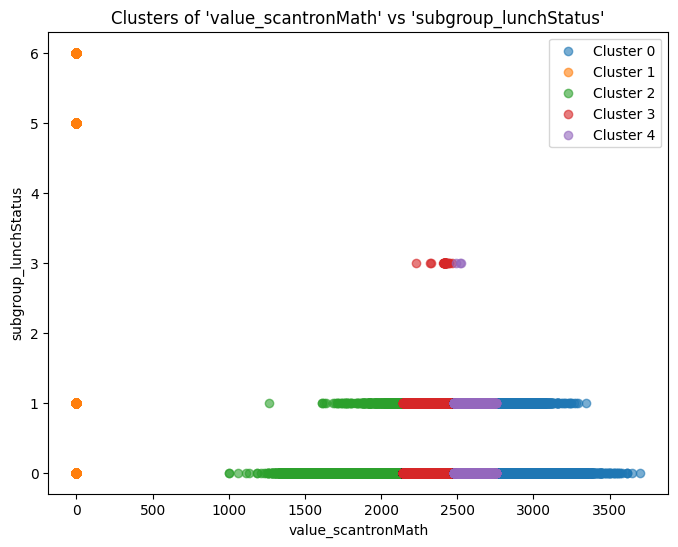

"\n   'measurementTypeId',\n    'subgroup_specialEd',\n    'subgroup_lunchStatus',\n    'subgroup_gender',\n    'subgroup_ethnicity',\n    "

In [19]:
# Select the feature used for clustering
X_visual = df_current[['value_scantronMath', 'subgroup_lunchStatus']].dropna()

# Standardize only the feature used in clustering
X_visual_scaled = scaler.transform(X_visual[['value_scantronMath']])

# Predict clusters based on the scaled feature
X_visual['cluster'] = kmeans.predict(X_visual_scaled)

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in np.unique(X_visual['cluster']):
    cluster_data = X_visual[X_visual['cluster'] == cluster]
    plt.scatter(cluster_data['value_scantronMath'], cluster_data['subgroup_lunchStatus'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Clusters of 'value_scantronMath' vs 'subgroup_lunchStatus'")
plt.xlabel('value_scantronMath')
plt.ylabel('subgroup_lunchStatus')
plt.legend()
plt.show()


'''
   'measurementTypeId',
    'subgroup_specialEd',
    'subgroup_lunchStatus',
    'subgroup_gender',
    'subgroup_ethnicity',
    '''

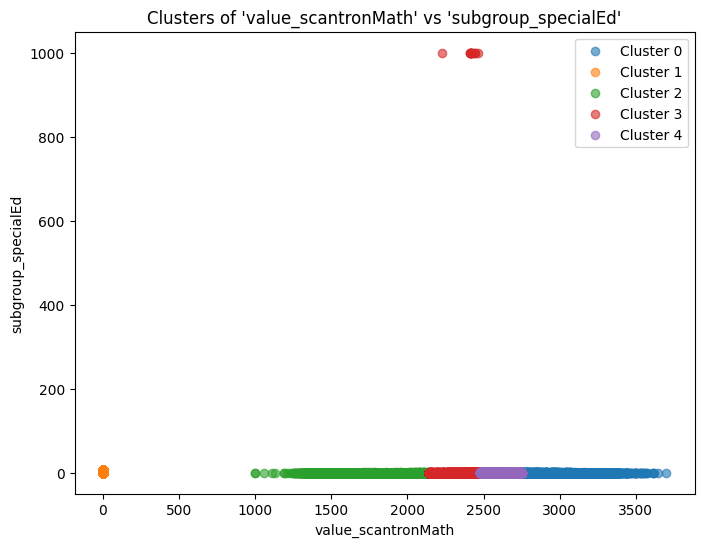

"\n   'measurementTypeId',\n    'subgroup_specialEd',\n    'subgroup_gender',\n    'subgroup_ethnicity',\n    "

In [20]:
# Select the feature used for clustering
X_visual = df_current[['value_scantronMath',  'subgroup_specialEd']].dropna()

# Standardize only the feature used in clustering
X_visual_scaled = scaler.transform(X_visual[['value_scantronMath']])

# Predict clusters based on the scaled feature
X_visual['cluster'] = kmeans.predict(X_visual_scaled)

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in np.unique(X_visual['cluster']):
    cluster_data = X_visual[X_visual['cluster'] == cluster]
    plt.scatter(cluster_data['value_scantronMath'], cluster_data['subgroup_specialEd'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Clusters of 'value_scantronMath' vs 'subgroup_specialEd'")
plt.xlabel('value_scantronMath')
plt.ylabel('subgroup_specialEd')
plt.legend()
plt.show()


'''
   'measurementTypeId',
    'subgroup_gender',
    'subgroup_ethnicity',
    '''

C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


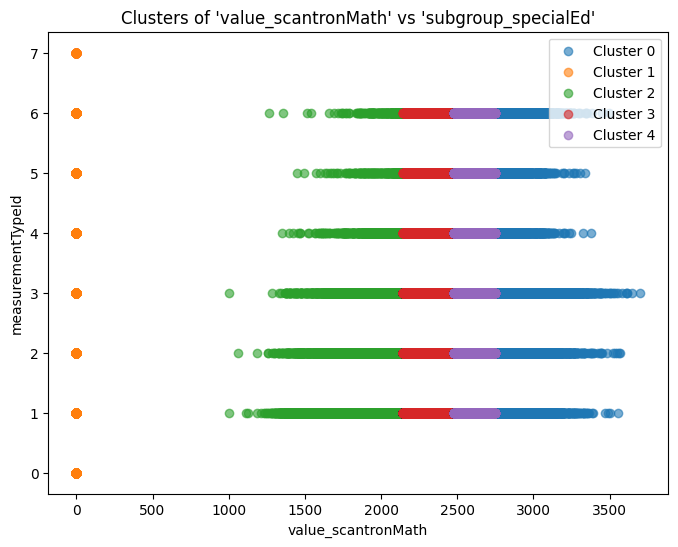

"\n   'measurementTypeId',\n    'subgroup_gender',\n    "

In [21]:
# Select the feature used for clustering
X_visual = df_current[['value_scantronMath',  'measurementTypeId']].dropna()

# Standardize only the feature used in clustering
X_visual_scaled = scaler.transform(X_visual[['value_scantronMath']])

# Predict clusters based on the scaled feature
X_visual['cluster'] = kmeans.predict(X_visual_scaled)

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in np.unique(X_visual['cluster']):
    cluster_data = X_visual[X_visual['cluster'] == cluster]
    plt.scatter(cluster_data['value_scantronMath'], cluster_data['measurementTypeId'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Clusters of 'value_scantronMath' vs 'subgroup_specialEd'")
plt.xlabel('value_scantronMath')
plt.ylabel('measurementTypeId')
plt.legend()
plt.show()


'''
   'measurementTypeId',
    'subgroup_gender',
    '''

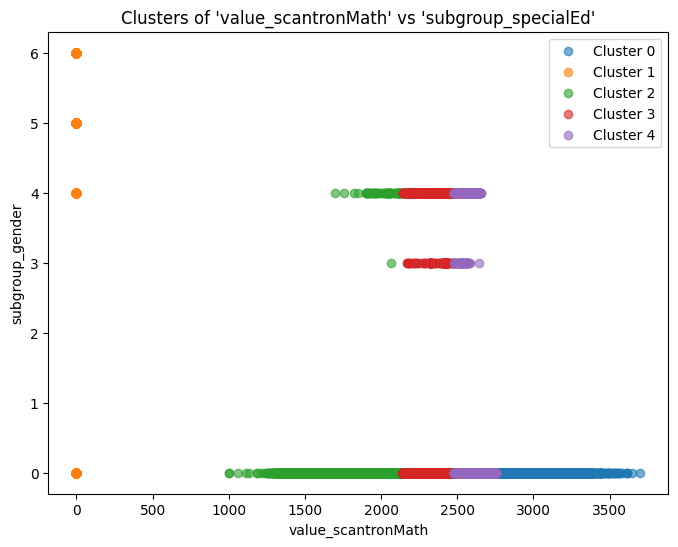

"\n   'measurementTypeId',\n    'subgroup_gender',\n    "

In [22]:
# Select the feature used for clustering
X_visual = df_current[['value_scantronMath',  'subgroup_gender']].dropna()

# Standardize only the feature used in clustering
X_visual_scaled = scaler.transform(X_visual[['value_scantronMath']])

# Predict clusters based on the scaled feature
X_visual['cluster'] = kmeans.predict(X_visual_scaled)

# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in np.unique(X_visual['cluster']):
    cluster_data = X_visual[X_visual['cluster'] == cluster]
    plt.scatter(cluster_data['value_scantronMath'], cluster_data['subgroup_gender'], label=f"Cluster {cluster}", alpha=0.6)

plt.title("Clusters of 'value_scantronMath' vs 'subgroup_specialEd'")
plt.xlabel('value_scantronMath')
plt.ylabel('subgroup_gender')
plt.legend()
plt.show()


'''
   'measurementTypeId',
    'subgroup_gender',
    '''